<a href="https://colab.research.google.com/github/JeromeMberia/Hypothyroid_prediction/blob/main/IP_Week_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IP Week 8

## Define the Question

### Specifying the Question

> Predicticing whether a patient has hypothyroid based on some factors.


### Defining the Metric for Success

> Having an accuracy score of above 90%

### Understanding the context 

> Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. This help use identify whether a patients could have hypothyroid during the early stage.

### Recording the Experimental Design

1. Load , read and explore the dataset.
2. Clean the dataset.
3. Perform Exploratory Data Analysis.
4. Perform Regression Analysis
5. Create decision Tree modal
    * Applying Random forest
    * Applying Adaboost 
    * Applying Gradientboost
6. Create Support Vector Machine(SVM) modal
    * Applying Polymomial Kernel
    * Applying Radial basis function Kernel
    * Applying Sigmoid Kernel

### Data Relevance

> Yes this dataset is relevant, it data that was collect from medical camp for Thyroid patients which will help us identfy patients with hypothyroid in its early stages.

## Dataset

### Importing the Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

### Reading the Dataseet

In [ ]:
df = pd.read_csv('/content/hypothyroid.csv')

### Checking the Dataset

In [ ]:
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [ ]:
df.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


In [ ]:
df.nunique()

status                         2
age                           93
sex                            3
on_thyroxine                   2
query_on_thyroxine             2
on_antithyroid_medication      2
thyroid_surgery                2
query_hypothyroid              2
query_hyperthyroid             2
pregnant                       2
sick                           2
tumor                          2
lithium                        2
goitre                         2
TSH_measured                   2
TSH                          240
T3_measured                    2
T3                            70
TT4_measured                   2
TT4                          269
T4U_measured                   2
T4U                          159
FTI_measured                   2
FTI                          281
TBG_measured                   2
TBG                           53
dtype: int64

In [ ]:
df.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

In [ ]:
rows = df.shape[0]
columns = df.shape[1]
print(f'This dataset has {columns} columns and {rows} rows')

This dataset has 26 columns and 3163 rows


In [ ]:
df.describe()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163
unique,2,93,3,2,2,2,2,2,2,2,2,2,2,2,2,240,2,70,2,269,2,159,2,281,2,53
top,negative,?,F,f,f,f,f,f,f,f,f,f,f,f,y,0,y,?,y,?,y,?,y,?,n,?
freq,3012,446,2182,2702,3108,3121,3059,2922,2920,3100,3064,3123,3161,3064,2695,894,2468,695,2914,249,2915,248,2916,247,2903,2903


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

In [ ]:
df.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

In [ ]:
col = list(df.columns)
for i in col:
  print(f'{i}')
  print('')
  print(df[i].unique())
  print('****************************************************************************')
  print('')

status

['hypothyroid' 'negative']
****************************************************************************

age

['72' '15' '24' '77' '85' '64' '20' '42' '69' '75' '53' '59' '68' '50'
 '78' '65' '28' '43' '40' '84' '?' '83' '63' '73' '36' '27' '48' '71' '60'
 '34' '79' '62' '74' '32' '41' '70' '29' '5' '58' '35' '51' '22' '16' '44'
 '39' '47' '18' '17' '88' '56' '30' '45' '66' '52' '54' '80' '33' '38'
 '92' '67' '46' '13' '89' '61' '49' '26' '57' '31' '90' '81' '25' '37'
 '76' '87' '23' '55' '86' '98' '21' '97' '1' '6' '14' '82' '11' '19' '9'
 '12' '10' '8' '7' '4' '93']
****************************************************************************

sex

['M' 'F' '?']
****************************************************************************

on_thyroxine

['f' 't']
****************************************************************************

query_on_thyroxine

['f' 't']
****************************************************************************

on_antithyroid_medication

['f' 

## Data Wrangling */* Data Cleaning

### Duplicates

In [ ]:
df.duplicated().sum()

77

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.duplicated().sum()

0

In [ ]:
df = df.replace('?', np.nan)

In [ ]:
df['age'] = df['age'].dropna()

In [ ]:
df.drop('TBG', axis='columns', inplace=True)

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

columns = ['TSH','T3','TT4','T4U','FTI']

for column in columns:
  df[[column]] = imputer.fit_transform(df[[column]])

In [ ]:
df['sex'].fillna(df['sex'].mode()[0], inplace=True)

### Missing Value

In [ ]:
df.isnull().sum()

status                         0
age                          438
sex                            0
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
thyroid_surgery                0
query_hypothyroid              0
query_hyperthyroid             0
pregnant                       0
sick                           0
tumor                          0
lithium                        0
goitre                         0
TSH_measured                   0
TSH                            0
T3_measured                    0
T3                             0
TT4_measured                   0
TT4                            0
T4U_measured                   0
T4U                            0
FTI_measured                   0
FTI                            0
TBG_measured                   0
dtype: int64

In [ ]:
columns = ['TSH','T3','TT4','T4U','FTI']

for column in columns:
  df[column] = df[column].astype('float')

In [ ]:
df.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.8,y,1.7,y,86.0,y,0.91,y,95.0,n
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.8,y,1.8,y,99.0,y,1.01,y,98.0,n
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.2,y,0.6,y,71.0,y,0.68,y,104.0,n
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.3,y,0.1,y,65.0,y,0.48,y,137.0,n
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0.0,y,1.8,y,139.0,y,0.97,y,143.0,n


In [ ]:
df.dtypes

status                        object
age                           object
sex                           object
on_thyroxine                  object
query_on_thyroxine            object
on_antithyroid_medication     object
thyroid_surgery               object
query_hypothyroid             object
query_hyperthyroid            object
pregnant                      object
sick                          object
tumor                         object
lithium                       object
goitre                        object
TSH_measured                  object
TSH                          float64
T3_measured                   object
T3                           float64
TT4_measured                  object
TT4                          float64
T4U_measured                  object
T4U                          float64
FTI_measured                  object
FTI                          float64
TBG_measured                  object
dtype: object

In [ ]:
df.age.unique()

array(['72', '15', '24', '77', '85', '64', '20', '42', '69', '75', '53',
       '59', '68', '50', '78', '65', '28', '43', '40', '84', nan, '83',
       '63', '73', '36', '27', '48', '71', '60', '34', '79', '62', '74',
       '32', '41', '70', '29', '5', '58', '35', '51', '22', '16', '44',
       '39', '47', '18', '17', '88', '56', '30', '45', '66', '52', '54',
       '80', '33', '38', '92', '67', '46', '13', '89', '61', '49', '26',
       '57', '31', '90', '81', '25', '37', '76', '87', '23', '55', '86',
       '98', '21', '97', '1', '6', '14', '82', '11', '19', '9', '12',
       '10', '8', '7', '4', '93'], dtype=object)

In [ ]:
df = df.dropna()

In [ ]:
df['age'] = df['age'].astype('int')

### Outliers

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

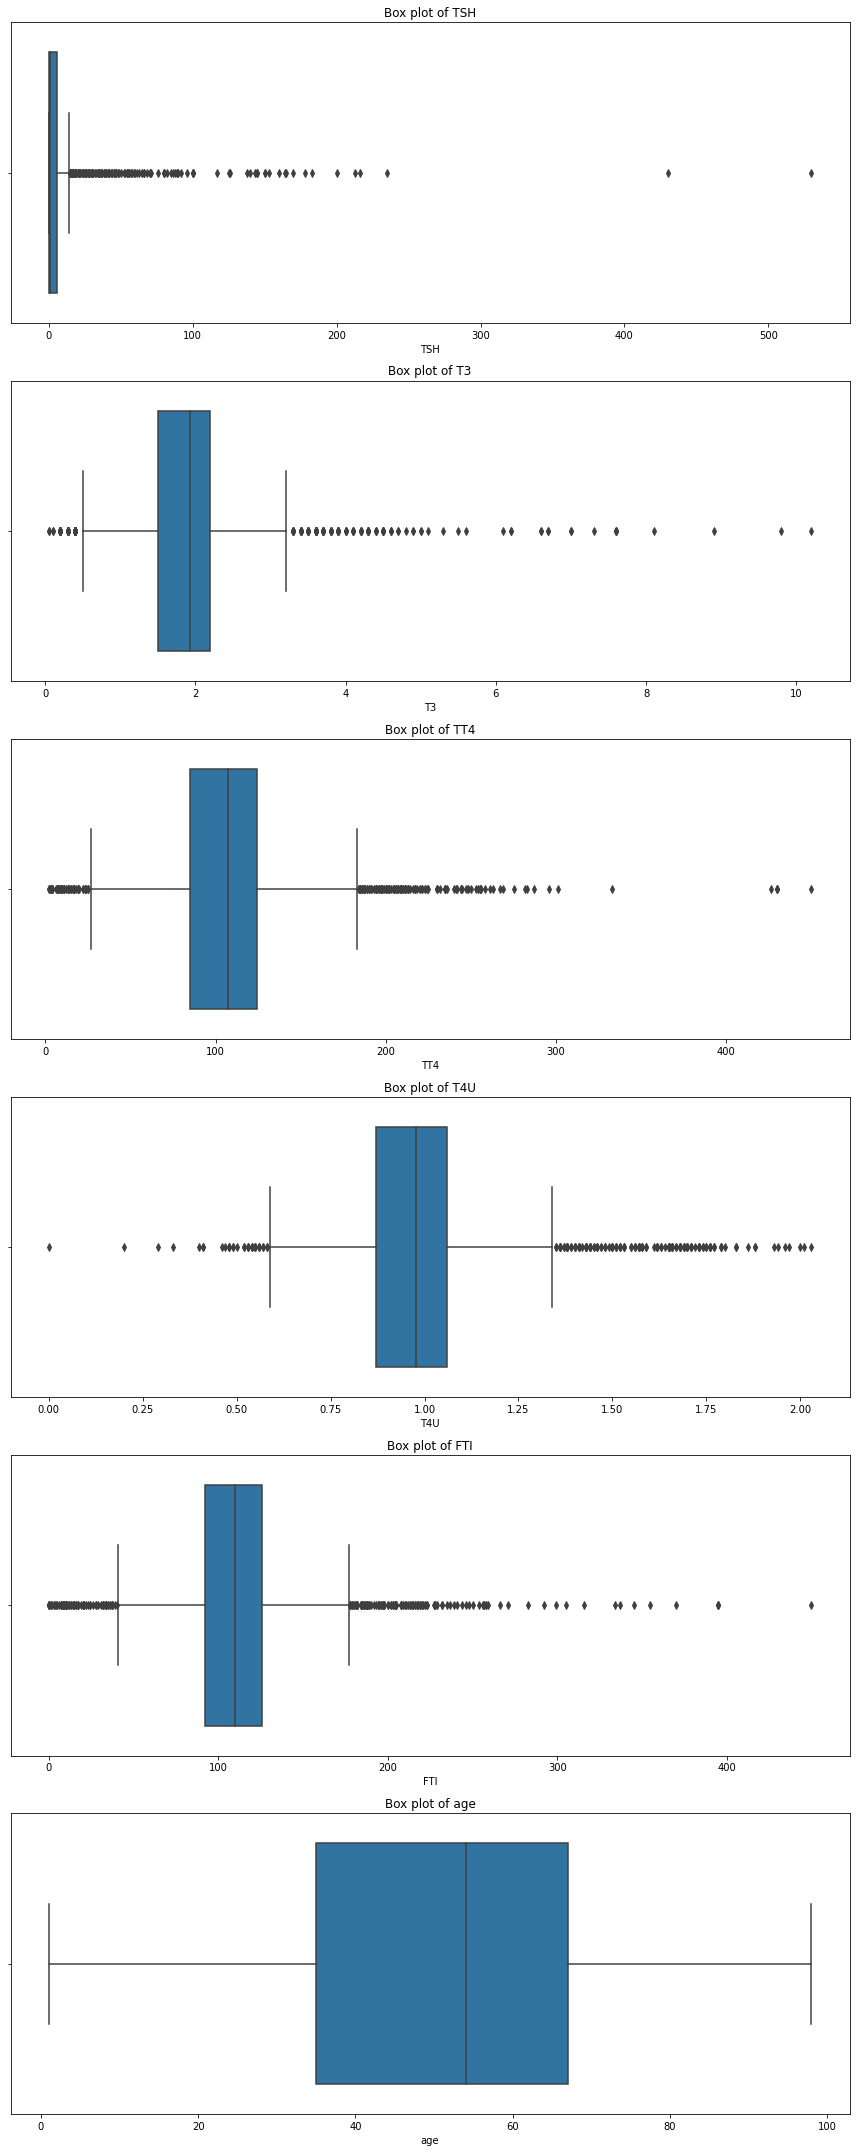

In [ ]:
numeric = df[['TSH','T3','TT4','T4U','FTI','age']]

columns = None
columns = list(numeric.columns)
nrows = len(numeric.columns)

fig, ax = plt.subplots(nrows=nrows, ncols=1, figsize=(12,30))  

i = 0
for column in columns:

  sns.boxplot(df[column], ax=ax[i])
  ax[i].set_title(f'Box plot of {column}')
  ax[i].set_xlabel(column)
  i+=1

plt.tight_layout()
plt.show()

## Exploratory Data Analysis (EDA)

### Univariate Analysis

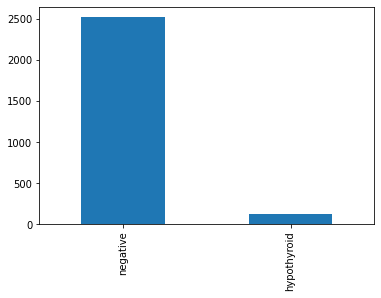

In [ ]:
df['status'].value_counts().plot(kind='bar')

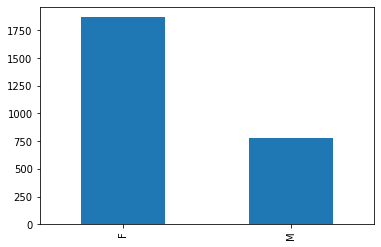

In [ ]:
df['sex'].value_counts().plot(kind='bar')

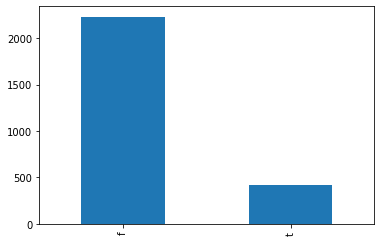

In [ ]:
df['on_thyroxine'].value_counts().plot(kind='bar')

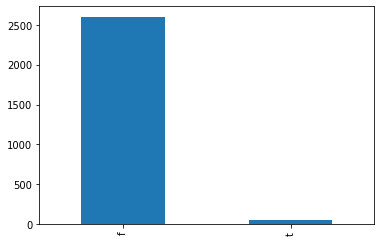

In [ ]:
df['query_on_thyroxine'].value_counts().plot(kind='bar')

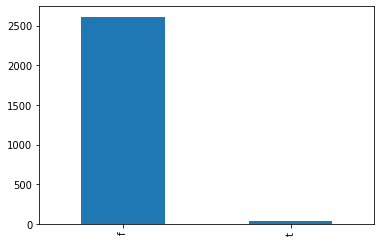

In [ ]:
df['on_antithyroid_medication'].value_counts().plot(kind='bar')

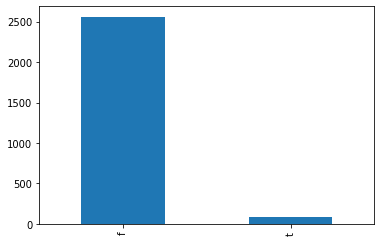

In [ ]:
df['thyroid_surgery'].value_counts().plot(kind='bar')

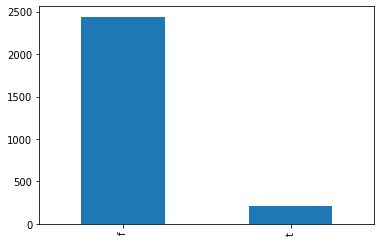

In [ ]:
df['query_hypothyroid'].value_counts().plot(kind='bar')

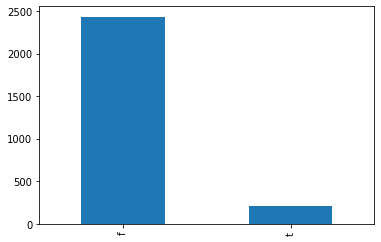

In [ ]:
df['query_hyperthyroid'].value_counts().plot(kind='bar')

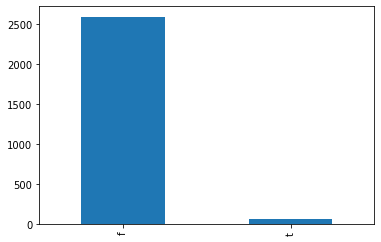

In [ ]:
df['pregnant'].value_counts().plot(kind='bar')

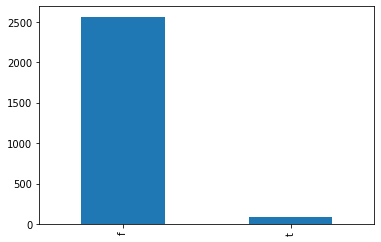

In [ ]:
df['sick'].value_counts().plot(kind='bar')

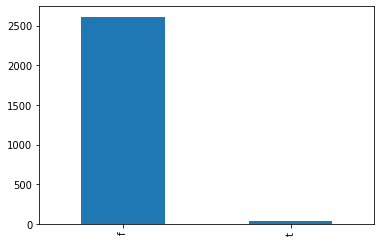

In [ ]:
df['tumor'].value_counts().plot(kind='bar')

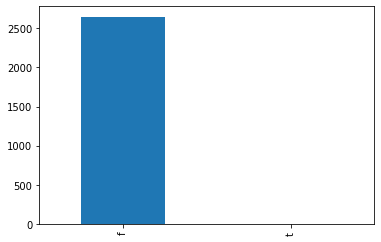

In [ ]:
df['lithium'].value_counts().plot(kind='bar')

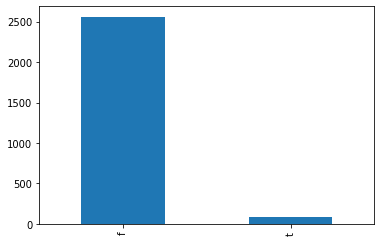

In [ ]:
df['goitre'].value_counts().plot(kind='bar')

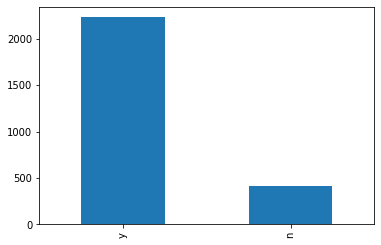

In [ ]:
df['TSH_measured'].value_counts().plot(kind='bar')

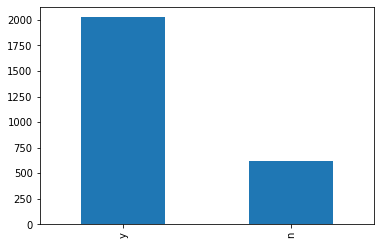

In [ ]:
df['T3_measured'].value_counts().plot(kind='bar')

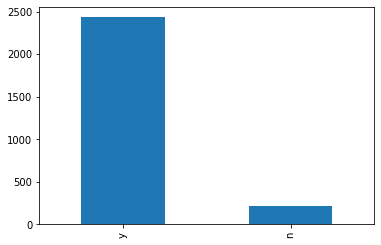

In [ ]:
df['TT4_measured'].value_counts().plot(kind='bar')

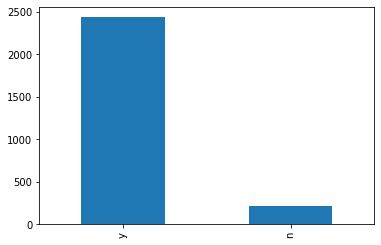

In [ ]:
df['T4U_measured'].value_counts().plot(kind='bar')

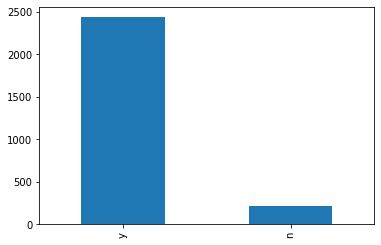

In [ ]:
df['FTI_measured'].value_counts().plot(kind='bar')

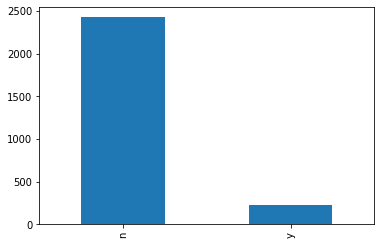

In [ ]:
df['TBG_measured'].value_counts().plot(kind='bar')

#### Central Tendency

##### mean

In [ ]:
numeric = df[['TSH','T3','TT4','T4U','FTI','age']]

columns = None
columns = list(numeric.columns)

for column in columns:
  mean = df[column].mean()
  print(f'This is the mean of the {column} column: ')
  print(f'{mean}')
  print('  ')

This is the mean of the TSH column: 
5.879462603676157
  
This is the mean of the T3 column: 
1.938333640973077
  
This is the mean of the TT4 column: 
108.97061227609453
  
This is the mean of the T4U column: 
0.9882666282523533
  
This is the mean of the FTI column: 
112.28114991386323
  
This is the mean of the age column: 
51.112537764350456
  


##### median

In [ ]:
numeric = df[['TSH','T3','TT4','T4U','FTI','age']]
columns = list(numeric.columns)
for column in columns:
  median = df[column].median()
  print(f'This is the median of the {column} column: ')
  print(f'{median}')
  print('  ')

This is the median of the TSH column: 
1.0
  
This is the median of the T3 column: 
1.933665835411471
  
This is the median of the TT4 column: 
107.0
  
This is the median of the T4U column: 
0.9775588338602038
  
This is the median of the FTI column: 
110.0
  
This is the median of the age column: 
54.0
  


##### mode

In [ ]:
columns = list(df.columns)
for column in columns:
  mode = df[column].mode()[0]
  print(f'This is the mode of the {column} column: ')
  print(f'{mode}')
  print('  ')

This is the mode of the status column: 
negative
  
This is the mode of the age column: 
59
  
This is the mode of the sex column: 
F
  
This is the mode of the on_thyroxine column: 
f
  
This is the mode of the query_on_thyroxine column: 
f
  
This is the mode of the on_antithyroid_medication column: 
f
  
This is the mode of the thyroid_surgery column: 
f
  
This is the mode of the query_hypothyroid column: 
f
  
This is the mode of the query_hyperthyroid column: 
f
  
This is the mode of the pregnant column: 
f
  
This is the mode of the sick column: 
f
  
This is the mode of the tumor column: 
f
  
This is the mode of the lithium column: 
f
  
This is the mode of the goitre column: 
f
  
This is the mode of the TSH_measured column: 
y
  
This is the mode of the TSH column: 
0.0
  
This is the mode of the T3_measured column: 
y
  
This is the mode of the T3 column: 
1.933665835411471
  
This is the mode of the TT4_measured column: 
y
  
This is the mode of the TT4 column: 
108.70692

#### Dispersion

##### Standard Deviation

In [ ]:
numeric = df[['TSH','T3','TT4','T4U','FTI','age']]
columns = list(numeric.columns)
for column in columns:
  standard_deviation = df[column].std()
  print(f'This is the Standard Deviation of the {column} column: ')
  print(f'{standard_deviation}')
  print('  ')

This is the Standard Deviation of the TSH column: 
22.235557424932875
  
This is the Standard Deviation of the T3 column: 
0.8603864593818198
  
This is the Standard Deviation of the TT4 column: 
42.844805839687595
  
This is the Standard Deviation of the T4U column: 
0.21239581109927128
  
This is the Standard Deviation of the FTI column: 
40.881768900191055
  
This is the Standard Deviation of the age column: 
19.275099315576004
  


##### Variance

In [ ]:
numeric = df[['TSH','T3','TT4','T4U','FTI','age']]
columns = list(numeric.columns)
for column in columns:
  variance = df[column].var()
  print(f'This is the variance of the {column} column: ')
  print(f'{variance}')
  print('  ')

This is the variance of the TSH column: 
494.42001399748756
  
This is the variance of the T3 column: 
0.7402648594875838
  
This is the variance of the TT4 column: 
1835.6773874405283
  
This is the variance of the T4U column: 
0.04511198057251733
  
This is the variance of the FTI column: 
1671.3190284086286
  
This is the variance of the age column: 
371.5294536253186
  


##### Maximum

In [ ]:
numeric = df[['TSH','T3','TT4','T4U','FTI','age']]
columns = list(numeric.columns)
for column in columns:
  max = df[column].max()
  print(f'This is the largest value in the {column} column: ')
  print(f'{max}')
  print('  ')

This is the largest value in the TSH column: 
530.0
  
This is the largest value in the T3 column: 
10.2
  
This is the largest value in the TT4 column: 
450.0
  
This is the largest value in the T4U column: 
2.03
  
This is the largest value in the FTI column: 
450.0
  
This is the largest value in the age column: 
98
  


##### Minimum

In [ ]:
numeric = df[['TSH','T3','TT4','T4U','FTI','age']]
columns = list(numeric.columns)
for column in columns:
  min = df[column].min()
  print(f'This is the small value in the {column} column: ')
  print(f'{min}')
  print('  ')

This is the small value in the TSH column: 
0.0
  
This is the small value in the T3 column: 
0.05
  
This is the small value in the TT4 column: 
2.0
  
This is the small value in the T4U column: 
0.0
  
This is the small value in the FTI column: 
0.0
  
This is the small value in the age column: 
1
  


##### Range

In [ ]:
numeric = df[['TSH','T3','TT4','T4U','FTI','age']]
columns = list(numeric.columns)
for column in columns:
  max = df[column].max()
  min = df[column].min()
  range = max - min
  print(f'This is the range of the {column} column: ')
  print(f'{range}')
  print('  ')

This is the range of the TSH column: 
530.0
  
This is the range of the T3 column: 
10.149999999999999
  
This is the range of the TT4 column: 
448.0
  
This is the range of the T4U column: 
2.03
  
This is the range of the FTI column: 
450.0
  
This is the range of the age column: 
97
  


##### Quantiles

###### First Quantile

In [ ]:
numeric = df[['TSH','T3','TT4','T4U','FTI','age']]
columns = list(numeric.columns)
for column in columns:
  first_quantile = df[column].quantile(0.25)
  print(f'This is the first quantile of the {column} column: ')
  print(f'{first_quantile}')
  print('  ')

This is the first quantile of the TSH column: 
0.0
  
This is the first quantile of the T3 column: 
1.5
  
This is the first quantile of the TT4 column: 
85.0
  
This is the first quantile of the T4U column: 
0.87
  
This is the first quantile of the FTI column: 
92.0
  
This is the first quantile of the age column: 
35.0
  


###### Second Quantile

In [ ]:
numeric = df[['TSH','T3','TT4','T4U','FTI','age']]
columns = list(numeric.columns)
for column in columns:
  second_quantile = df[column].quantile(0.5)
  print(f'This is the second quantile of the {column} column: ')
  print(f'{second_quantile}')
  print('  ')

This is the second quantile of the TSH column: 
1.0
  
This is the second quantile of the T3 column: 
1.933665835411471
  
This is the second quantile of the TT4 column: 
107.0
  
This is the second quantile of the T4U column: 
0.9775588338602038
  
This is the second quantile of the FTI column: 
110.0
  
This is the second quantile of the age column: 
54.0
  


###### Third Quantile

In [ ]:
numeric = df[['TSH','T3','TT4','T4U','FTI','age']]
columns = list(numeric.columns)
for column in columns:
  third_quantile = df[column].quantile(0.75)
  print(f'This is the third quantile of the {column} column: ')
  print(f'{third_quantile}')
  print('  ')

This is the third quantile of the TSH column: 
5.809319650323071
  
This is the third quantile of the T3 column: 
2.2
  
This is the third quantile of the TT4 column: 
124.25
  
This is the third quantile of the T4U column: 
1.06
  
This is the third quantile of the FTI column: 
126.0
  
This is the third quantile of the age column: 
67.0
  


#### Descriptions of the distribution curve

##### Skewness

In [ ]:
numeric = df[['TSH','T3','TT4','T4U','FTI','age']]
columns = list(numeric.columns)
for column in columns:
  skewness = df[column].skew()
  print(f'This is the skewness of the {column} column: ')
  print(f'{skewness}')
  print('  ')

This is the skewness of the TSH column: 
11.31733203918639
  
This is the skewness of the T3 column: 
2.413205758309051
  
This is the skewness of the TT4 column: 
1.4801406377046933
  
This is the skewness of the T4U column: 
1.2802308714154602
  
This is the skewness of the FTI column: 
1.4018012467114267
  
This is the skewness of the age column: 
-0.1697885598080683
  


##### Kurtosis

In [ ]:
numeric = df[['TSH','T3','TT4','T4U','FTI','age']]
columns = list(numeric.columns)
for column in columns:
  kurtosis = df[column].kurt()
  print(f'This is the kurtosis of the {column} column: ')
  print(f'{kurtosis}')
  print('  ')

This is the kurtosis of the TSH column: 
191.11716175103328
  
This is the kurtosis of the T3 column: 
14.582389650903023
  
This is the kurtosis of the TT4 column: 
7.513796573658112
  
This is the kurtosis of the T4U column: 
3.8263973138809564
  
This is the kurtosis of the FTI column: 
7.753708596626577
  
This is the kurtosis of the age column: 
-0.95939175678269
  


### Bivariate Analysis

In [ ]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

numeric = df.drop(['TSH','T3','TT4','T4U','FTI','age'], axis=1)

columns = None
columns = list(numeric.columns)

for column in columns:
  df[column] = labelencoder.fit_transform(df[column])

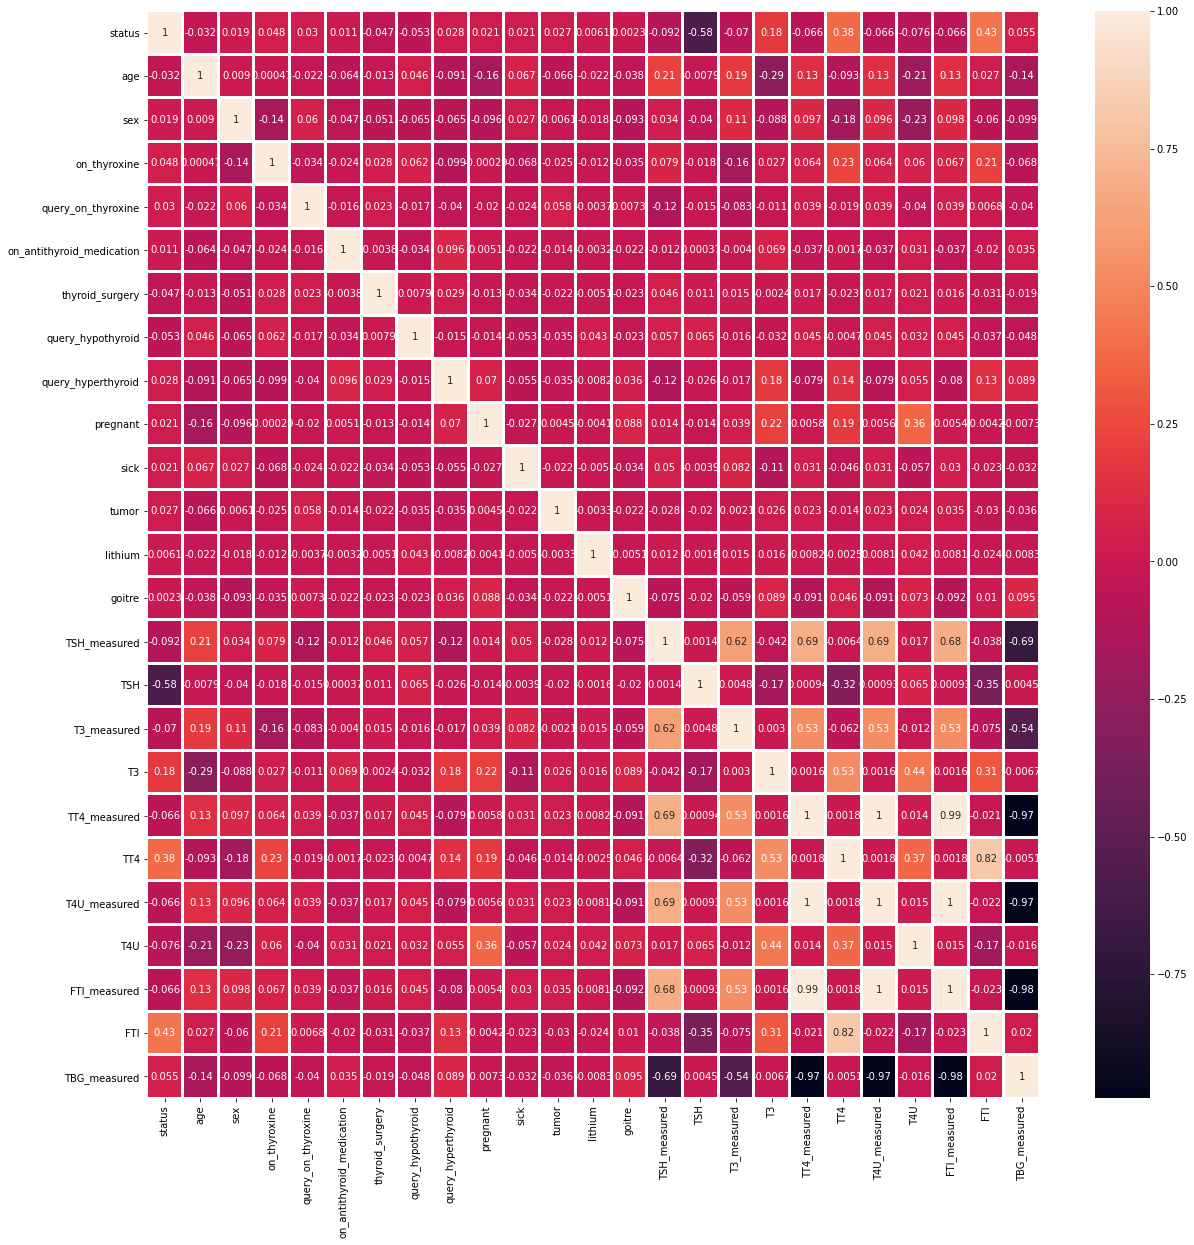

In [ ]:
plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(),annot=True, linewidths=2, linecolor='white')
plt.show()

> The only colunms that are highly corrilate are FTI, TT4, TSH.

### Multivariate Analysis

#### Regression Analysis

##### Decision Trees

###### Random forests

In [ ]:
x = df.drop(['status'], axis=1).copy()
y = df['status'].copy()
x = x.to_numpy().copy
y = y.to_numpy().copy 

In [ ]:
test_features = df.columns.to_list()
test_features.remove('status')

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           cv = 10, 
                           n_jobs = -1, 
                           verbose = 2)

In [ ]:
# Fit the grid search to the data
grid_search.fit(x_train, y_train)
grid_search.best_params_

Fitting 10 folds for each of 576 candidates, totalling 5760 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   19.6s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 1454 tasks      | elapsed: 15.0min
[Parallel(n_jobs=-1)]: Done 1981 tasks      | elapsed: 19.8min
[Parallel(n_jobs=-1)]: Done 2588 tasks      | elapsed: 25.6min
[Parallel(n_jobs=-1)]: Done 3277 tasks      | elapsed: 33.7min
[Parallel(n_jobs=-1)]: Done 4046 tasks      | elapsed: 41.1min
[Parallel(n_jobs=-1)]: Done 4897 tasks      | elapsed: 50.1min
[Parallel(n_jobs=-1)]: Done 5760 out of 5760 | elapsed: 59.6min finished


{'bootstrap': True,
 'max_depth': 80,
 'max_features': None,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

> Note: this process took 1 hour for 10 folds

In [ ]:
par = grid_search.best_params_

max_depth = par['max_depth']
max_features = par['max_features']
min_samples_leaf = par['min_samples_leaf']
min_samples_split = par['min_samples_split']
n_estimators = par['n_estimators']

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators = n_estimators, 
                               random_state = 42, 
                               min_samples_split=min_samples_split,
                               min_samples_leaf=min_samples_leaf,
                               max_features=max_features,
                               max_depth=max_depth) 
forest = forest.fit(x_train, y_train)

In [ ]:
y_pred = forest.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix = confusion_matrix(y_test, y_pred.round())
print('The confusion matrix:')
confusion_matrix

The confusion matrix:


array([[ 36,   2],
       [  7, 750]])

In [ ]:
print(f'Accuracy score of {accuracy_score(y_test, y_pred.round())}')

Accuracy score of 0.9886792452830189


In [ ]:
comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
comparison_frame.describe()

,Actual,Predicted
count,795.000000,795.000000
mean,0.952201,0.943246
std,0.213474,0.212214
min,0.000000,0.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


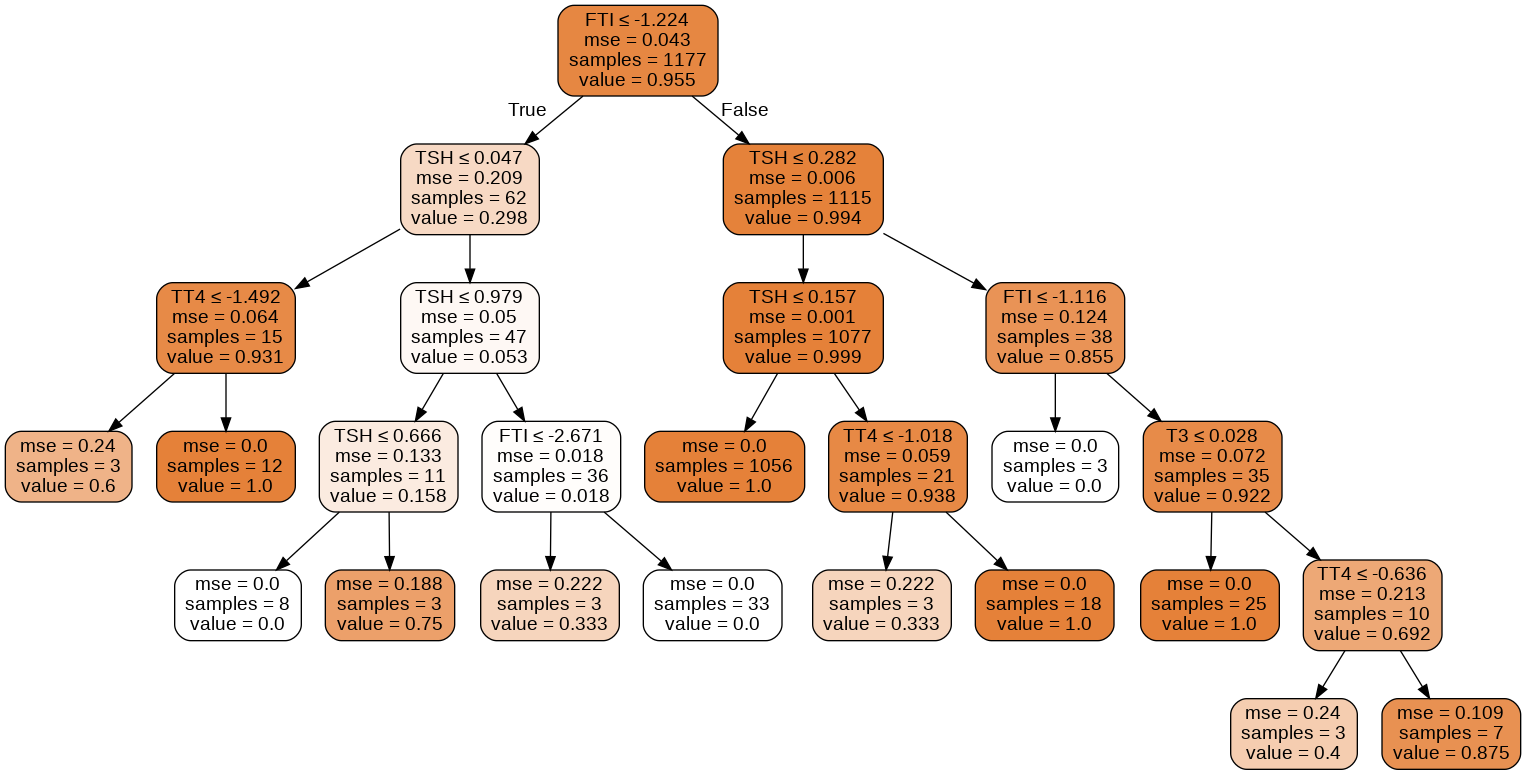

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
# pick a specific tree from the forest
tree = forest.estimators_[50]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('absenteism_forest.png')
Image(graph.create_png())

In [ ]:
# Get numerical feature importances
importances = list(tree.feature_importances_)

# We now use some Python magic to connect each feature with its importance
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]

print(feature_importances) #this already has all the information we need, but it can be tricky to see when there are too many features.
print()

# Nice to have: We can sort the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

[('age', 0.0), ('sex', 0.0), ('on_thyroxine', 0.0), ('query_on_thyroxine', 0.0), ('on_antithyroid_medication', 0.0), ('thyroid_surgery', 0.0), ('query_hypothyroid', 0.0), ('query_hyperthyroid', 0.0), ('pregnant', 0.0), ('sick', 0.0), ('tumor', 0.0), ('lithium', 0.0), ('goitre', 0.0), ('TSH_measured', 0.0), ('TSH', 0.26), ('T3_measured', 0.0), ('T3', 0.01), ('TT4_measured', 0.0), ('TT4', 0.03), ('T4U_measured', 0.0), ('T4U', 0.0), ('FTI_measured', 0.0), ('FTI', 0.69), ('TBG_measured', 0.0)]

Variable: FTI                  Importance: 0.69
Variable: TSH                  Importance: 0.26
Variable: TT4                  Importance: 0.03
Variable: T3                   Importance: 0.01
Variable: age                  Importance: 0.0
Variable: sex                  Importance: 0.0
Variable: on_thyroxine         Importance: 0.0
Variable: query_on_thyroxine   Importance: 0.0
Variable: on_antithyroid_medication Importance: 0.0
Variable: thyroid_surgery      Importance: 0.0
Variable: query_hypothyro

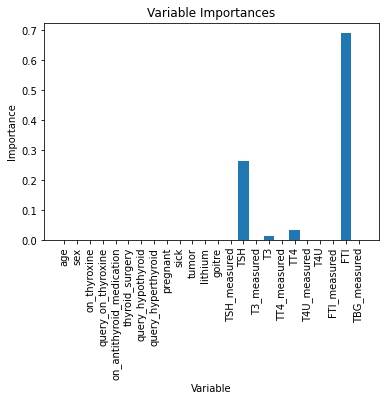

In [ ]:
# list of x locations for plotting
a = len(importances)
b = np.arange(a)
x_values = list(b)
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, test_features, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

######  Ada boosted trees

In [ ]:
x=None
y=None
x_train=None
x_test=None
y_train=None 
y_test=None

In [ ]:
x = df.drop(['status'], axis=1).copy()
y = df['status'].copy()
x = x.to_numpy().copy
y = y.to_numpy().copy  

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
#Creating a grid of hyperparameters
param_dist = {
 'n_estimators': [50, 100,200,300],
 'learning_rate': [0.01,0.05,0.1,0.3,1],
 'algorithm':['SAMME','SAMME.R']
 }
 
ada=AdaBoostClassifier()

grid_search = GridSearchCV(estimator=ada, param_grid=param_dist, cv = 10)

grid_search.fit(x_train, y_train)
grid_search.best_params_

{'algorithm': 'SAMME', 'learning_rate': 0.01, 'n_estimators': 200}

In [ ]:
grid_search.best_score_

0.9900853974783154

In [ ]:
par = grid_search.best_params_

learning_rate = par['learning_rate']
algorithm = par['algorithm']
n_estimators = par['n_estimators']

In [ ]:
from sklearn.tree import DecisionTreeClassifier
ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                              algorithm=algorithm,
                              n_estimators=n_estimators,
                              learning_rate=learning_rate, 
                              random_state=42)

ada_boost = ada_boost.fit(x_train, y_train)
y_pred = ada_boost.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print('The confusion matrix:')
confusion_matrix

The confusion matrix:


array([[ 16,   3],
       [  3, 508]])

In [ ]:
print(f'Accuracy score of {accuracy_score(y_test, y_pred)}')
9886792452830189

Accuracy score of 0.9886792452830189


9886792452830189

###### Results
> Ababboost is better modal with a higher accuracy score compared to Random forest's modal when the random forest is 3 folds but there accuracy score are similar when random forest is 10 folds

##### Support Vector Machine(SVM)

>Cleaning the dataset was done before. This how I dealt with missing values:
* The numeric columns with missing values were substituted with the mean while the categorical column used the most frequent character.

In [ ]:
poly_dict={}

###### Polymomial

In [ ]:
x=None
y=None
x_train=None
x_test=None
y_train=None 
y_test=None

In [ ]:
x = df.drop(['status'], axis=1).copy()
y = df['status'].copy()
x = x.to_numpy()
y = y.to_numpy()

In [ ]:
from sklearn.decomposition import PCA
# Applying the reduction algorithm: PCA
pca = PCA(n_components=2).fit(x)
x = pca.transform(x)
x.shape

(2648, 2)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
from sklearn.svm import SVC
svc = SVC()
parameters = {'C': [0.1,1, 10, 100], 
              'gamma': ['scale', 'auto'],
              'kernel': ['poly'],
              'degree': [1],
              # 'degree': [3],
              'decision_function_shape':['ovo','ovr']} 


In [ ]:
grid_search = GridSearchCV(estimator=svc, 
                           param_grid=parameters,
                           refit = True,
                           verbose = 3,
                           cv=10)

grid_search.fit(x_train, y_train)

Fitting 10 folds for each of 16 candidates, totalling 160 fits
[CV] C=0.1, decision_function_shape=ovo, degree=1, gamma=scale, kernel=poly 
[CV]  C=0.1, decision_function_shape=ovo, degree=1, gamma=scale, kernel=poly, score=0.976, total=   0.0s
[CV] C=0.1, decision_function_shape=ovo, degree=1, gamma=scale, kernel=poly 
[CV]  C=0.1, decision_function_shape=ovo, degree=1, gamma=scale, kernel=poly, score=0.991, total=   0.0s
[CV] C=0.1, decision_function_shape=ovo, degree=1, gamma=scale, kernel=poly 
[CV]  C=0.1, decision_function_shape=ovo, degree=1, gamma=scale, kernel=poly, score=0.981, total=   0.0s
[CV] C=0.1, decision_function_shape=ovo, degree=1, gamma=scale, kernel=poly 
[CV]  C=0.1, decision_function_shape=ovo, degree=1, gamma=scale, kernel=poly, score=0.962, total=   0.0s
[CV] C=0.1, decision_function_shape=ovo, degree=1, gamma=scale, kernel=poly 
[CV]  C=0.1, decision_function_shape=ovo, degree=1, gamma=scale, kernel=poly, score=0.976, total=   0.0s
[CV] C=0.1, decision_functi

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  C=0.1, decision_function_shape=ovr, degree=1, gamma=scale, kernel=poly, score=0.976, total=   0.0s
[CV] C=0.1, decision_function_shape=ovr, degree=1, gamma=scale, kernel=poly 
[CV]  C=0.1, decision_function_shape=ovr, degree=1, gamma=scale, kernel=poly, score=0.967, total=   0.0s
[CV] C=0.1, decision_function_shape=ovr, degree=1, gamma=scale, kernel=poly 
[CV]  C=0.1, decision_function_shape=ovr, degree=1, gamma=scale, kernel=poly, score=0.995, total=   0.0s
[CV] C=0.1, decision_function_shape=ovr, degree=1, gamma=auto, kernel=poly 
[CV]  C=0.1, decision_function_shape=ovr, degree=1, gamma=auto, kernel=poly, score=0.976, total=   0.0s
[CV] C=0.1, decision_function_shape=ovr, degree=1, gamma=auto, kernel=poly 
[CV]  C=0.1, decision_function_shape=ovr, degree=1, gamma=auto, kernel=poly, score=0.991, total=   0.0s
[CV] C=0.1, decision_function_shape=ovr, degree=1, gamma=auto, kernel=poly 
[CV]  C=0.1, decision_function_shape=ovr, degree=1, gamma=auto, kernel=poly, score=0.981, total

[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:    1.9s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100],
                         'decision_function_shape': ['ovo', 'ovr'],
                         'degree': [1], 'gamma': ['scale', 'auto'],
                         'kernel': ['poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [ ]:
grid_search.best_params_

{'C': 10,
 'decision_function_shape': 'ovo',
 'degree': 1,
 'gamma': 'scale',
 'kernel': 'poly'}

In [ ]:
par = grid_search.best_params_

c = par['C']
decision_function_shape = par['decision_function_shape']
degree = par['degree']
gamma = par['gamma']
kernel = par['kernel']

In [ ]:
# Building the model 
polyclassifier = SVC(C=c,
                     kernel=kernel, 
                     degree=degree, 
                     gamma=gamma,  
                     decision_function_shape=decision_function_shape)
# Training the model using the training set
polyclassifier.fit(x_train, y_train)

y_pred = polyclassifier.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
print(f'Accuracy score of {accuracy_score(y_test, y_pred.round())}')
poly = accuracy_score(y_test, y_pred.round())
poly_dict[1] = poly

Accuracy score of 0.9754716981132076


In [ ]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print('The confusion matrix:')
confusion_matrix

The confusion matrix:


array([[ 11,   8],
       [  5, 506]])

###### Radial basis function (rbf)

In [ ]:
x=None
y=None
x_train=None
x_test=None
y_train=None 
y_test=None

In [ ]:
x = df.drop(['status'], axis=1).copy()
y = df['status'].copy()
x = x.to_numpy()
y = y.to_numpy()

In [ ]:
from sklearn.decomposition import PCA
# Applying the reduction algorithm: PCA
pca = PCA(n_components=2).fit(x)
x = pca.transform(x)
x.shape

(2648, 2)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
from sklearn.svm import SVC
svc = SVC()
parameters = {'C': [0.1,1, 10, 100], 
              'gamma': ['scale', 'auto'],
              'kernel': ['rbf'],
              'decision_function_shape':['ovo','ovr']}

In [ ]:
grid_search = GridSearchCV(estimator=svc, 
                           param_grid=parameters,
                           refit = True,
                           verbose = 3)

grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=0.1, decision_function_shape=ovo, gamma=scale, kernel=rbf .....
[CV]  C=0.1, decision_function_shape=ovo, gamma=scale, kernel=rbf, score=0.983, total=   0.0s
[CV] C=0.1, decision_function_shape=ovo, gamma=scale, kernel=rbf .....
[CV]  C=0.1, decision_function_shape=ovo, gamma=scale, kernel=rbf, score=0.965, total=   0.0s
[CV] C=0.1, decision_function_shape=ovo, gamma=scale, kernel=rbf .....
[CV]  C=0.1, decision_function_shape=ovo, gamma=scale, kernel=rbf, score=0.974, total=   0.0s
[CV] C=0.1, decision_function_shape=ovo, gamma=scale, kernel=rbf .....
[CV]  C=0.1, decision_function_shape=ovo, gamma=scale, kernel=rbf, score=0.972, total=   0.0s
[CV] C=0.1, decision_function_shape=ovo, gamma=scale, kernel=rbf .....
[CV]  C=0.1, decision_function_shape=ovo, gamma=scale, kernel=rbf, score=0.981, total=   0.0s
[CV] C=0.1, decision_function_shape=ovo, gamma=auto, kernel=rbf ......
[CV]  C=0.1, decision_function_shape=ovo, g

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  C=0.1, decision_function_shape=ovr, gamma=scale, kernel=rbf, score=0.974, total=   0.0s
[CV] C=0.1, decision_function_shape=ovr, gamma=scale, kernel=rbf .....
[CV]  C=0.1, decision_function_shape=ovr, gamma=scale, kernel=rbf, score=0.972, total=   0.0s
[CV] C=0.1, decision_function_shape=ovr, gamma=scale, kernel=rbf .....
[CV]  C=0.1, decision_function_shape=ovr, gamma=scale, kernel=rbf, score=0.981, total=   0.0s
[CV] C=0.1, decision_function_shape=ovr, gamma=auto, kernel=rbf ......
[CV]  C=0.1, decision_function_shape=ovr, gamma=auto, kernel=rbf, score=0.983, total=   0.0s
[CV] C=0.1, decision_function_shape=ovr, gamma=auto, kernel=rbf ......
[CV]  C=0.1, decision_function_shape=ovr, gamma=auto, kernel=rbf, score=0.965, total=   0.0s
[CV] C=0.1, decision_function_shape=ovr, gamma=auto, kernel=rbf ......
[CV]  C=0.1, decision_function_shape=ovr, gamma=auto, kernel=rbf, score=0.972, total=   0.0s
[CV] C=0.1, decision_function_shape=ovr, gamma=auto, kernel=rbf ......
[CV]  C=0.1, 

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    1.4s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100],
                         'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': ['scale', 'auto'], 'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [ ]:
grid_search.best_params_

{'C': 1, 'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'rbf'}

In [ ]:
par = grid_search.best_params_

c = par['C']
decision_function_shape = par['decision_function_shape']
gamma = par['gamma']
kernel = par['kernel']

In [ ]:
# Building the model 
rbfclassifier = SVC(C=c,
                    kernel=kernel,  
                    gamma=gamma,  
                    decision_function_shape=decision_function_shape)
# Training the model using the training set
rbfclassifier.fit(x_train, y_train)
y_pred = rbfclassifier.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
print(f'Accuracy score of {accuracy_score(y_test, y_pred.round())}')
confusion_matrix = confusion_matrix(y_test, y_pred)
print('The confusion matrix:')
confusion_matrix

Accuracy score of 0.9754716981132076
The confusion matrix:


array([[ 10,   9],
       [  4, 507]])

In [ ]:
RBF = accuracy_score(y_test, y_pred.round())
SVM_list.append(RBF)

###### Sigmoid function

In [ ]:
x=None
y=None
x_train=None
x_test=None
y_train=None 
y_test=None

In [ ]:
x = df.drop(['status'], axis=1).copy()
y = df['status'].copy()
x = x.to_numpy()
y = y.to_numpy() 

In [ ]:
print(x)
print(y)

[[ 72.   1.   0. ...   1.  10.   0.]
 [ 15.   0.   1. ...   1.  17.   0.]
 [ 24.   1.   0. ...   1.   0.   0.]
 ...
 [ 77.   1.   0. ...   1. 104.   0.]
 [ 74.   0.   0. ...   1. 137.   0.]
 [ 56.   0.   1. ...   1. 143.   0.]]
[0 0 0 ... 1 1 1]


In [ ]:
from sklearn.decomposition import PCA
# Applying the reduction algorithm: PCA
pca = PCA(n_components=2).fit(x)
x = pca.transform(x)
x.shape

(2648, 2)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
from sklearn.svm import SVC
svc = SVC()
parameters = {'C': [0.1,1, 10, 100], 
              'gamma': ['scale', 'auto'],
              'kernel': ['sigmoid'],
              'decision_function_shape':['ovo','ovr']}

In [ ]:
grid_search = GridSearchCV(estimator=svc, 
                           param_grid=parameters,
                           refit = True,
                           verbose = 3,
                           cv=10)

grid_search.fit(x_train, y_train)

Fitting 10 folds for each of 16 candidates, totalling 160 fits
[CV] C=0.1, decision_function_shape=ovo, gamma=scale, kernel=sigmoid .
[CV]  C=0.1, decision_function_shape=ovo, gamma=scale, kernel=sigmoid, score=0.946, total=   0.0s
[CV] C=0.1, decision_function_shape=ovo, gamma=scale, kernel=sigmoid .
[CV]  C=0.1, decision_function_shape=ovo, gamma=scale, kernel=sigmoid, score=0.946, total=   0.0s
[CV] C=0.1, decision_function_shape=ovo, gamma=scale, kernel=sigmoid .
[CV]  C=0.1, decision_function_shape=ovo, gamma=scale, kernel=sigmoid, score=0.946, total=   0.0s
[CV] C=0.1, decision_function_shape=ovo, gamma=scale, kernel=sigmoid .
[CV]  C=0.1, decision_function_shape=ovo, gamma=scale, kernel=sigmoid, score=0.951, total=   0.0s
[CV] C=0.1, decision_function_shape=ovo, gamma=scale, kernel=sigmoid .
[CV]  C=0.1, decision_function_shape=ovo, gamma=scale, kernel=sigmoid, score=0.951, total=   0.0s
[CV] C=0.1, decision_function_shape=ovo, gamma=scale, kernel=sigmoid .
[CV]  C=0.1, decision

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  C=0.1, decision_function_shape=ovo, gamma=scale, kernel=sigmoid, score=0.946, total=   0.0s
[CV] C=0.1, decision_function_shape=ovo, gamma=scale, kernel=sigmoid .
[CV]  C=0.1, decision_function_shape=ovo, gamma=scale, kernel=sigmoid, score=0.946, total=   0.0s
[CV] C=0.1, decision_function_shape=ovo, gamma=auto, kernel=sigmoid ..
[CV]  C=0.1, decision_function_shape=ovo, gamma=auto, kernel=sigmoid, score=0.946, total=   0.0s
[CV] C=0.1, decision_function_shape=ovo, gamma=auto, kernel=sigmoid ..
[CV]  C=0.1, decision_function_shape=ovo, gamma=auto, kernel=sigmoid, score=0.946, total=   0.0s
[CV] C=0.1, decision_function_shape=ovo, gamma=auto, kernel=sigmoid ..
[CV]  C=0.1, decision_function_shape=ovo, gamma=auto, kernel=sigmoid, score=0.946, total=   0.0s
[CV] C=0.1, decision_function_shape=ovo, gamma=auto, kernel=sigmoid ..
[CV]  C=0.1, decision_function_shape=ovo, gamma=auto, kernel=sigmoid, score=0.951, total=   0.0s
[CV] C=0.1, decision_function_shape=ovo, gamma=auto, kernel=s

[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:    3.3s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100],
                         'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': ['scale', 'auto'], 'kernel': ['sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [ ]:
grid_search.best_params_

{'C': 0.1,
 'decision_function_shape': 'ovo',
 'gamma': 'scale',
 'kernel': 'sigmoid'}

In [ ]:
par = grid_search.best_params_

c = par['C']
decision_function_shape = par['decision_function_shape']
gamma = par['gamma']
kernel = par['kernel']

In [ ]:
# Building the model 
sigclassifier = SVC(C=c,
                    kernel=kernel,  
                    gamma=gamma,  
                    decision_function_shape=decision_function_shape)
# Training the model using the training set
sigclassifier.fit(x_train, y_train)
y_pred = rbfclassifier.predict(x_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.9773584905660377

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
print(f'Accuracy score of {accuracy_score(y_test, y_pred)}')

confusion_matrix = confusion_matrix(y_test, y_pred)
print('The confusion matrix:')
confusion_matrix

Accuracy score of 0.9773584905660377
The confusion matrix:


array([[ 17,  13],
       [  5, 760]])

In [ ]:
sig = accuracy_score(y_test, y_pred.round())
SVM_list.append(sig)

###### Results
> Sigmoid has better accuracy scores. 